### EDA Plot Essentials — A Practical, No‑Fluff Guide

**Goal:** give you a tight mental model for when and how to use the most common exploratory plots — *and* how to read them.

We'll use a synthetic dataset that mimics bioinformatics‑ish data: cancer types (categorical), treatments (categorical), stages (categorical), a few numeric features (gene‑like expression, age, a derived score), plus a daily time axis.

### Imports

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

### Creating a DataFrame

In [253]:
np.random.seed(14)
N = 100
dates = pd.date_range("2024-01-01", periods=N, freq="D")

cancers = np.random.choice(["LUAD", "LUSC", "BRCA", "KIRC"], size=N)
treatments = np.random.choice(["A", "B", "C"], size=N)
stages = np.random.choice(["I", "II", "III"], size=N)
age = np.clip(np.random.normal(60, 12, size=N), 18, 90).astype(int)

expr1 = np.random.gamma(2.0, 2.0, size=N) * 10
expr2 = expr1 * 0.4 + np.random.normal(0, 5, size=N) + (np.where(treatments == "C", 5, 0))
score = 0.3*expr1 - 0.2*age + np.where(cancers=="BRCA", 8, 0) + np.random.normal(0, 5, size=N)

df = pd.DataFrame({
    "date": dates,
    "cancer": cancers,
    "treatment": treatments,
    "stage": stages,
    "age": age,
    "expr1": expr1,
    "expr2": expr2,
    "score": score
})
print(df.shape)
df.head()

(100, 8)


,date,cancer,treatment,stage,age,expr1,expr2,score
0,2024-01-01,KIRC,A,II,50,88.881064,27.316422,15.170326
1,2024-01-02,LUAD,A,I,80,26.483412,0.036460,-14.620494
2,2024-01-03,LUAD,B,III,54,24.410574,7.031079,-1.824360
3,2024-01-04,BRCA,A,III,55,66.763224,21.408367,15.968793
4,2024-01-05,KIRC,B,III,52,6.990475,1.811110,-4.872379


## Scatter Plot — numeric vs numeric

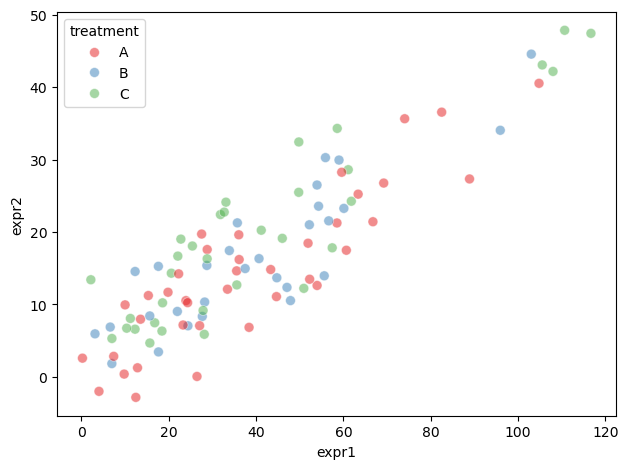

In [254]:
sns.scatterplot(data=df, 
                x="expr1", 
                y="expr2", 
                hue="treatment", 
                alpha=0.5,
                palette='Set1',
                s=50,
                )
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot1",bbox_inches="tight", dpi=300)
plt.show()


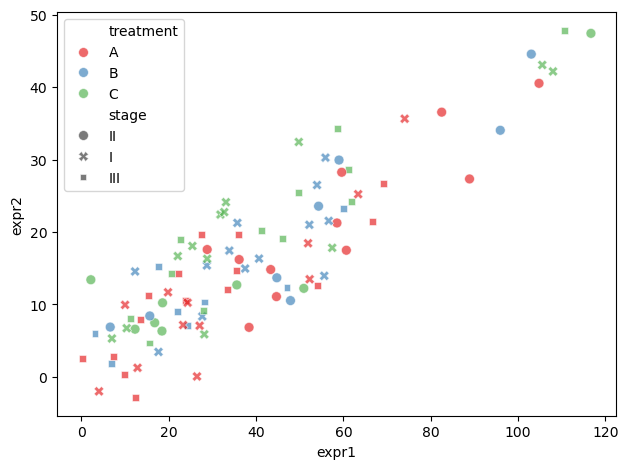

In [255]:
sns.scatterplot(data=df, 
                y="expr2", 
                x="expr1", 
                style="stage", 
                hue="treatment", 
                alpha=0.65,
                palette='Set1',
                s=50,
                )
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot2",bbox_inches="tight", dpi=300)
plt.show()

This scatter plot shows the relationship between expr1 and expr2, with each point representing one sample.

Treatment groups (A, B, C) are color-coded, allowing us to see how different therapies may shift values. Notice that treatment C tends to push expr2 higher for the same expr1.

Stages (I, II, III) are distinguished by marker shapes. This lets us see if progression stage aligns with the expression trend — for example, later stages may cluster differently along the axis.

Overall, there’s a clear positive correlation: as expr1 increases, expr2 tends to rise as well.

This is exactly what scatter plots are good for: identifying correlations, subgroup differences, and outliers.

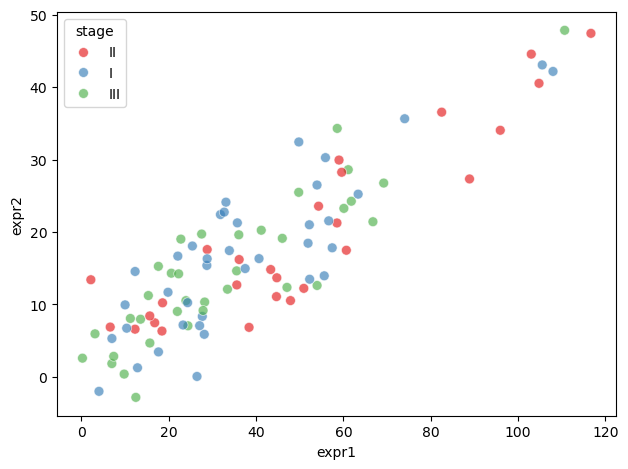

In [256]:
sns.scatterplot(data=df, 
                x="expr1", 
                y="expr2", 
                hue="stage", 
                alpha=0.65,
                palette='Set1',
                s=50,
                )
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot3",bbox_inches="tight", dpi=300)
plt.show()

### Box Plot — numeric vs categorical

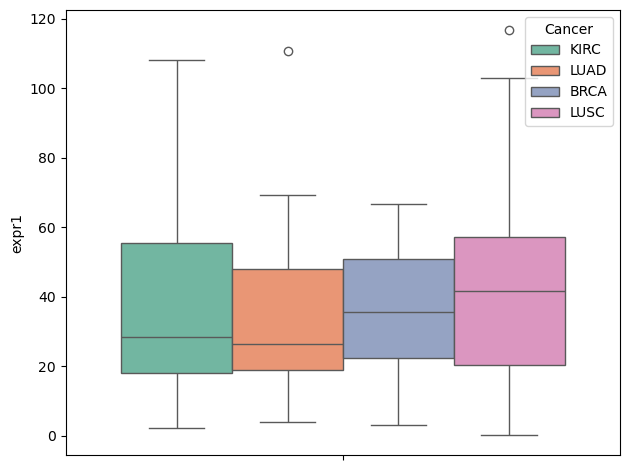

In [257]:
sns.boxplot(data=df, 
            y="expr1",
            hue='cancer',
            palette='Set2')
plt.legend(title = 'Cancer',loc='upper right')
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plotb1",bbox_inches="tight", dpi=300)
plt.show()

This boxplot displays the distribution of patient ages across four cancer groups (KIRC, LUAD, BRCA, LUSC).

Each box shows the median (horizontal line), the interquartile range (IQR) (the box), and the whiskers (typically 1.5× IQR).

Individual circles represent outliers — patients with ages much lower or higher than most in that group.

You can quickly compare central tendencies (LUAD patients look slightly older on average than BRCA, for example) and variability (some cancers show wider spreads).

Boxplots are great for spotting differences in spread, skewness, and unusual values across categories.

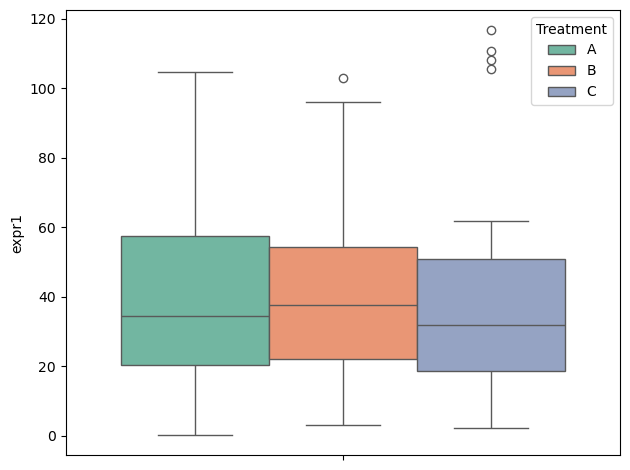

In [258]:
sns.boxplot(data=df, 
            y="expr1",
            hue='treatment',
            palette='Set2')
plt.legend(title = 'Treatment',loc='upper right')
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot4",bbox_inches="tight", dpi=300)
plt.show()

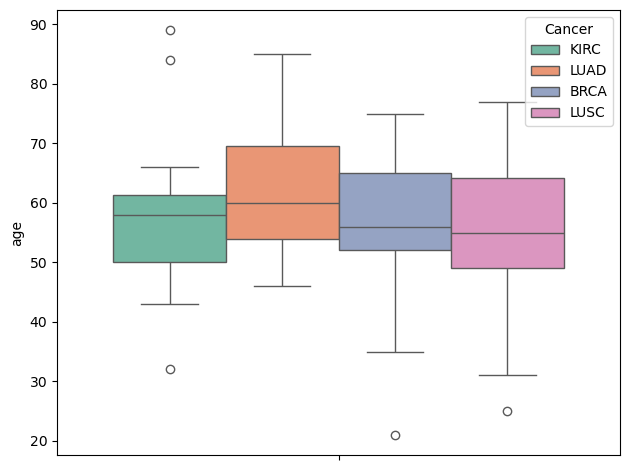

In [259]:
sns.boxplot(data=df, 
            y="age",
            hue='cancer',
            palette='Set2')
plt.legend(title = 'Cancer', loc='upper right')
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot5",bbox_inches="tight", dpi=300)
plt.show()

### Count Plot — categorical counts

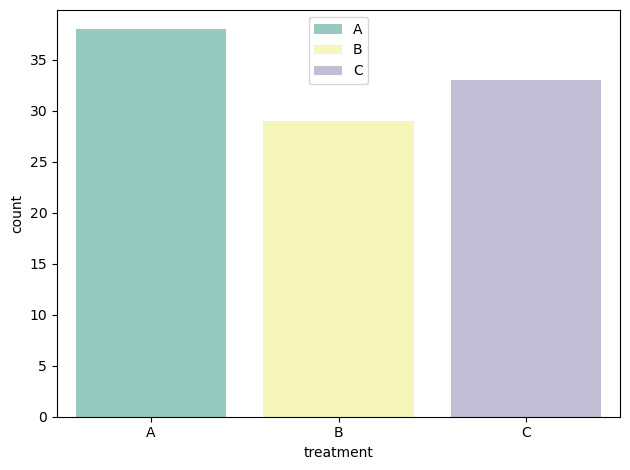

In [260]:
sns.countplot(data=df, x="treatment",
              hue = 'treatment',
              legend=True,
              palette="Set3")
plt.legend()
# plt.title("Count of treatments")
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot6",bbox_inches="tight", dpi=300)
plt.show()

This count plot shows the number of samples in each treatment group (A, B, C).

Treatment A has the largest count, followed by C, while B is the smallest.

Such plots are especially useful for class balance checks before modeling — imbalance could bias results or require resampling.

It’s a straightforward way to ensure your categorical variable isn’t skewed in a way that might affect analysis.

### Pie Chart — composition 

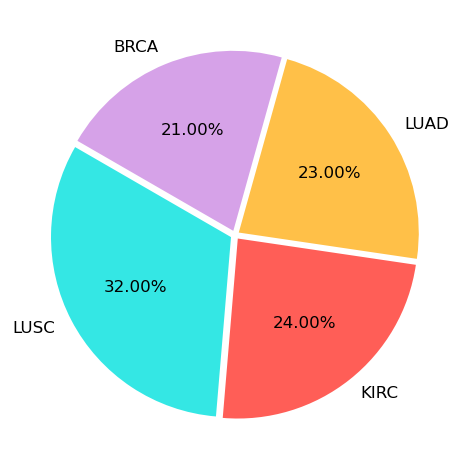

In [261]:
plt.pie(df['cancer'].value_counts(),
        autopct='%1.2f%%', 
        startangle=150,
        textprops={'fontsize':12},
        explode=(0.025,0.025,0.025,0.025),
        colors=('#34e7e4','#ff5e57','#ffc048','#D6A2E8'),
        labels=df['cancer'].value_counts().index
        )
plt.ylabel("")
plt.title("")
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot7",bbox_inches="tight", dpi=300)
plt.show()

This pie chart shows the proportional distribution of cancer types in the dataset.

LUSC is the largest slice (32%), followed by KIRC (24%) and LUAD (23%), while BRCA makes up the smallest proportion (21%).

The exploded slices make each group more distinct, and the percentages provide quick readability.

Pie charts are good for giving a high-level snapshot of composition, especially when the number of categories is small (≤5).

### Bar Plot — aggregate numeric by category

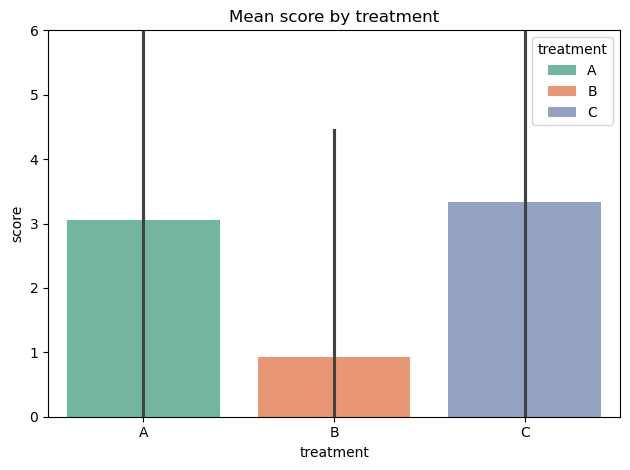

In [262]:
sns.barplot(data=df, x="treatment", y="score", 
            hue='treatment',
            palette="Set2",
            estimator=np.mean,
            legend=True)
plt.title("Mean score by treatment")
plt.ylim(0,6)
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot8",bbox_inches="tight", dpi=300)
plt.show()

This bar plot shows the mean score for each treatment group (A, B, C).

Treatment C has the highest mean score, while B has the lowest.

The error bars represent the confidence interval around the mean — wider bars indicate more variability or smaller sample sizes.

Barplots are useful when you want a quick comparison of central tendencies across categories without showing the entire distribution.

## KDE Plot — numeric distribution

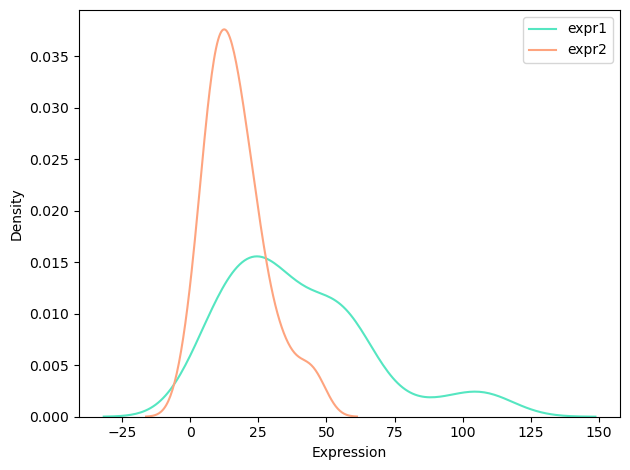

In [263]:
sns.kdeplot(data=df, x="expr1", label='expr1', color='#55E6C1')
sns.kdeplot(data=df, x="expr2", label='expr2',color='#FEA47F')
plt.xlabel("Expression")
plt.legend()
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot9",bbox_inches="tight", dpi=300)
plt.show()

This kernel density estimate (KDE) plot compares the distributions of expr1 and expr2.

The blue curve (expr1) shows a wider spread with multiple peaks, suggesting more variability and possible subgroups.

The orange curve (expr2) is sharper and more concentrated, indicating values cluster tightly in a narrower range.

Unlike histograms, KDE smooths the counts into a continuous curve, making it easier to compare multiple distributions on the same axis.

This visualization is excellent for spotting differences in spread, central tendency, and modality between variables.

## Heatmap — categorical × categorical

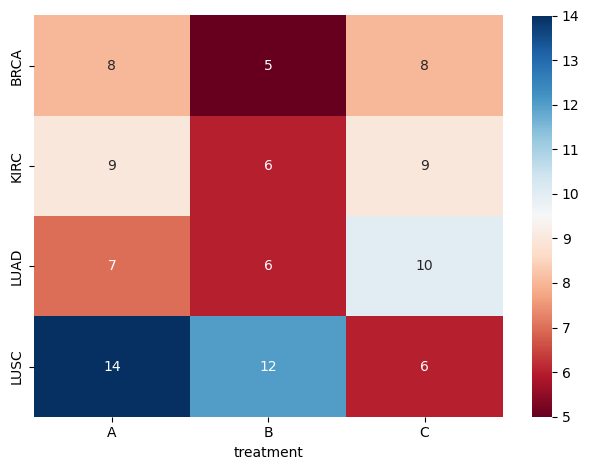

In [264]:
ct = pd.crosstab(df['cancer'], df['treatment'])
sns.heatmap(ct, annot=True, fmt="d", cmap="RdBu")
# plt.title("Cancer × Treatment counts")
plt.ylabel('')
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot10",bbox_inches="tight", dpi=300)
plt.show()

This heatmap shows the contingency table of cancer type vs. treatment.

Each cell indicates the count of samples for a given cancer–treatment combination.

The color scale makes patterns easy to spot: darker/lighter shades highlight overrepresented or underrepresented combinations.

For example, LUSC–A has the highest count (14), while BRCA–B has the lowest (5).

Heatmaps are powerful for categorical cross-tabulations because they compress a table into a visually intuitive gradient.

### Line Plot — numeric vs time

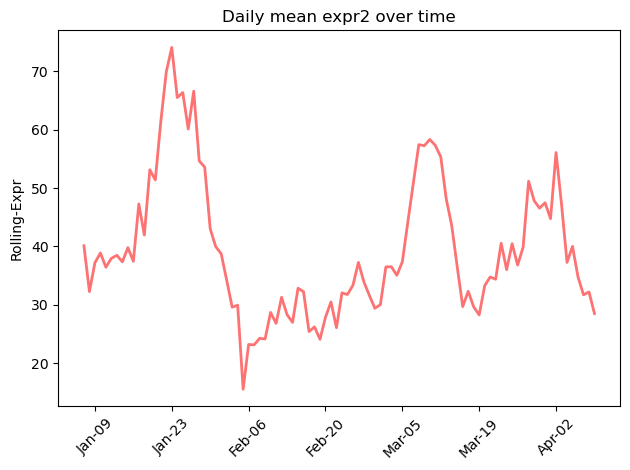

In [265]:
daily = df.groupby("date")["expr1"].mean().reset_index()
daily['Rolling'] = daily['expr1'].rolling(7).mean()
sns.lineplot(data=daily, x="date", y="Rolling", color= '#FD7272',linewidth=2)
plt.title("Daily mean expr2 over time")
plt.xlabel("")
plt.ylabel("Rolling-Expr", fontsize=10,labelpad=5)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# labels as Month-Day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/tusharsingh/Work/Blogs/blog4/plots/plot11",bbox_inches="tight", dpi=300)
plt.show()

This line plot shows the daily mean score across time (Jan–Apr 2024).

Each point on the x-axis is a date, and the y-axis represents the average score for that day.

The jagged pattern reflects day-to-day variability in the dataset, with occasional peaks and dips.

Line plots are particularly useful for time series analysis, where the focus is on trends, cycles, or sudden shifts across time.

### Final Thoughts
Exploratory plots aren’t just pretty pictures — they’re the first lens into your data’s story.

`Scatter plots help you spot relationships.`

`Box and bar plots reveal group differences.`

`Count and pie charts show category balance.`

`KDEs and heatmaps highlight distributions and associations.`

`Line plots bring trends over time to life.`

##### The key isn’t to memorize which plot to use — it’s to ask: What question am I trying to answer? Then pick the simplest visualization that makes the answer obvious.

##### EDA is where curiosity meets clarity. Keep your visuals clean, interpret them thoughtfully, and always look for the “why” behind the patterns.